# **5. Características de las señales sinusoidales análogas y discretas en cuanto a la frecuencia**

<p align = "justify"><b>Alcance: </b> Se definen las señales sinusoidales continuas y discretas en el tiempo y sus propiedades junto a las implicaciones del muestreo uniforme.



<p align = "justify">Ya que el concepto de frecuencia es conocido y sabemos que su dimensión es inversa a la del tiempo, modificaciones al argumento tiempo de una función (continuo o discreto) afectará la naturaleza de la frecuencia.

## **5.1. Señales sinusoidales continuas en el tiempo**

<p align = "justify">Una oscilación armónica simple se describe matemáticamente mediante la señal sinusoidal

\begin{equation}
x(t) = Acos(\Omega t + \theta) \tag{5.1}
\end{equation}

<p align = "justify">La señal sinusoidal se caracteriza por tres parámetros:

* $A$: Amplitud
* $\Omega$: Frecuencia en $rad/seg$
* $\theta$: Fase en $rad$

<p align = "justify">Donde $\Omega = 2\pi F$, con $F$ dado en $ciclos/seg$ ó $Hz$. El tablero 4.2 permite variar los parámetros de amplitud, frecuencia y fase de la señal $x(t) = ASen(2\pi Ft + \theta)$.

Código 5.1: genera una señal sinusoisal y se manipula sus parámetros

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipy
# Se crea una función para crear gráficos personalizados
def Ax(ax):

    ax.spines['left'].set_position(('data',0))                                  #Se ajustan los ejes del grafico
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['top'].set_color('none')
    ax.set_axisbelow(False)

    for i in ax.get_xticklabels() + ax.get_yticklabels():                       #Se configura los parámetros de las etiquetas de los ejess
        i.set_fontsize(15)
        i.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.75 ))

    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('', fontsize=20 ,rotation=0)
    ax.xaxis.set_label_coords(1.0, 0.0, ax.get_yaxis_transform())               #Se ubica los títulos de los ejes
    ax.yaxis.set_label_coords(0.0, 1.0, ax.get_xaxis_transform())
    return ax

interactive(children=(IntSlider(value=10, continuous_update=False, description='Amplitud:', max=50), FloatSlid…

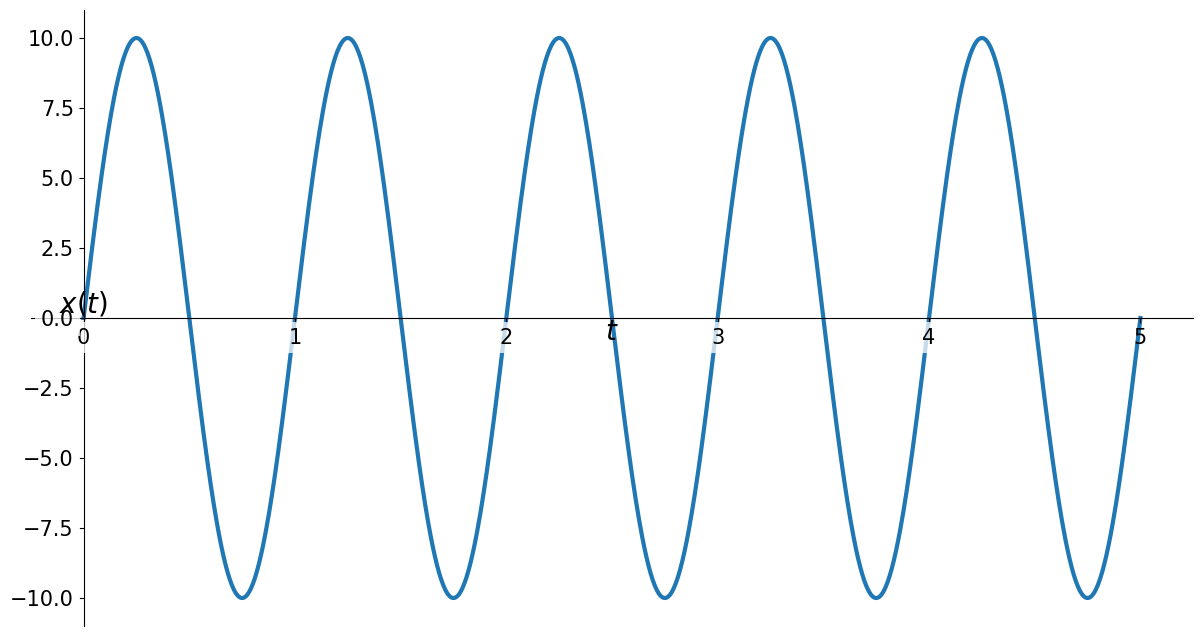

In [6]:
plt.rcParams['figure.figsize'] = 15, 8                                          #Se establece el tamaño de las gráficas
plt.rcParams['lines.linewidth'] = 3

def widget2(A, F, theta):                                                       #Se crea la función que construye las gráficas.
    fig, ax = plt.subplots(1)
    ax = Ax(ax)
    t = np.linspace(0, 5, 1000)
    x = A*np.sin(2*np.pi*F*t + theta*np.pi/180)
    ax.plot(t, x)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x(t)$')

display(ipy.interactive(                                                        #Se crea el tablero
    widget2,
    A=ipy.IntSlider(value=10, min=0, max=50, step=1,
                    description='Amplitud:',
                    continuous_update=False),
    F=ipy.FloatSlider(value=1, min=0, max=10, step=0.1,
                    description='Frecuencia [Hz]:',
                    continuous_update=False,
                    style=dict(description_width='initial')),
    theta=ipy.IntSlider(value=0, min=0, max=360, step=10,
                    description='Fase [grados]:',
                    continuous_update=False,
                    style=dict(description_width='initial'))
))

<p align = "center"><b>Tablero 5.1. </b> Señal sinusoidal continua

## **5.2. Propiedades de las señales sinusoidales continuas con relación a la frecuencia**
A continuación se enuncian las propiedades de las señales sinusoidales continuas en el tiempo.

<p align = "justify">1. Para todo valor fijo de frecuencia $F$, $x(t)$ es siempre periódica.

\begin{equation}
x(t) = x(t+T_0)
\end{equation}

<p align = "justify">Donde $T_0 = \frac{1}{F}$ es el periodo fundamental de la señal.

<p align = "justify">2. Las señales sinusoidales continuas en el tiempo de diferentes frecuencias son diferentes.

<p align = "justify">3. Un incremento en la frecuencia $F$, generará un incremento en las oscilaciones de la señal, es decir, en un mismo intervalo de tiempo se presentarán un mayor número de ciclos.\\

<p align = "justify">Dado lo anterior, estas características son también extensibles a las señales exponenciales complejas.

\begin{equation}
x(t) = A e^{j(\Omega t + \theta)} \tag{5.2}
\end{equation}

Donde

\begin{equation}
e^{\pm j\phi} = Cos(\phi) \pm jSen(\phi)
\end{equation}

<p align = "justify">Por lo tanto, la señal $x(t) =  Acos(\Omega t + \theta)$ puede definirse de la siguiente manera.

\begin{equation}
x(t) =  Acos(\Omega t + \theta) = \frac{A}{2}e^{j~(\Omega t + \theta)} + \frac{A}{2}e^{-j~(\Omega t + \theta)} \tag{5.3}
\end{equation}

<p align = "justify">El tablero 5.2 permite visualizar la señal $x(t) = Cos(2\pi t)$ como suma de dos fasores en el plano complejo y como función del tiempo.

Código 5.2: genera fasores en el plano complejo y sus proyecciones en el eje real

In [7]:
def widget3(t0):
    x_1 = .5*np.exp(1j*2*np.pi*t0)
    x_2 = np.conj(x_1)
    x = x_1 + x_2
    fig = plt.figure()
    ax1 = fig.add_axes([0, 0, 0.5, 0.8], projection='polar')
    ax1.set_rmax(1)
    ax1.set_ylabel('Eje Real', labelpad=30)
    ax1.set_xlabel('Eje Imaginario')
    arr_x1 = plt.arrow(np.angle(x_1), 0, 0, abs(x_1), width = 0.015,
                       length_includes_head = True,
                edgecolor = 'black', facecolor = 'green', lw = 2)
    arr_x2 = plt.arrow(np.angle(x_2), 0, 0, abs(x_2), width = 0.015,
                       length_includes_head = True,
                edgecolor = 'black', facecolor = 'green', lw = 2)
    arr_x = plt.arrow(np.angle(x), 0, 0, abs(x), width = 0.015,
                      length_includes_head = True, facecolor = 'blue')
    ax2 = fig.add_axes([0.5, 0, 0.5, 0.8])
    ax2 = Ax(ax2)
    t = np.arange(0, t0+.01, .01)
    x = .5*np.exp(1j*2*np.pi*t)
    ax2.plot(t, np.real(x + np.conj(x)))
    ax2.set_xlim(-0.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_ylabel('Eje Real')
    ax2.set_xlabel('t')
    plt.show()


display(ipy.interactive(
    widget3,
    t0=ipy.FloatSlider(value=0, step=.01, max = 1, min=0,
                       description='Valor de t:',
                       continuous_update=False)
))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Valor de t:', max=1.0, step…

<p align = "center"><b>Tablero 5.2. </b> Señal cosenoidal expresada como la suma de dos fasores

## **5.3. Señales sinusoidales discretas en el tiempo**

<p align = "justify">Una señal discreta se puede expresar a partir de una señal análoga de la siguiente forma.

\begin{equation}
x(t) = ACos(\Omega t + \theta)
\end{equation}

<p align = "justify">Donde el argumento $t$, es discretizado a partir de “$n\cdot T_s$”; donde $n$ representa la enésima muestra y $T_s$ el tiempo fijo de la toma entre muestras, es decir, el periodo de muestreo. Se tiene:

\begin{equation}
\begin{split}
x(n\cdot T_S) &= ACos(\Omega \cdot(n\cdot T_s) + \theta)\\
&= ACos(2\pi \cdot F \cdot T_s \cdot n + \theta)
\end{split}
\end{equation}

<p align = "justify">Donde $T_s = \frac{1}{F_s}$

\begin{equation}
x(n\cdot T_S) = ACos\left(2\pi \cdot \frac{F}{F_s} \cdot n + \theta\right) \tag{5.4}
\end{equation}

Con $\frac{F}{F_s} = f$.\\

<p align = "justify">La relación entre la frecuencia de la señal $F$ y la frecuencia de muestreo $F_s$, se denomina frecuencia discreta o frecuencia normalizada. Por lo tanto la señal sinusoidal discreta se denota por:

\begin{equation}
x(n\cdot T_S) = ACos(2\pi \cdot f \cdot n + \theta)
\end{equation}

<p align = "justify">El término $T_s$ en la notación de $x(nT_s)$, generalmente no se escribe, quedando solamente $x(n)$, por lo tanto, la expresión quedará:

\begin{equation}
x(n) = ACos(2\pi \cdot f \cdot n + \theta) \tag{5.5}
\end{equation}

<p align = "justify">En este punto se tienen tres tipos de frecuencias que deben ser tenidas en cuenta:

* $F$: frecuencia de la señal análoga, dada en $\frac{Ciclos}{Seg}$.
* $F_s$: frecuencia de muestreo, dada en  $\frac{Muestras}{Seg}$.
* $f$: frecuencia discreta, dada en las siguientes unidades:

\begin{equation}
\frac{\frac{Ciclos}{Seg}}{\frac{Muestras}{Seg}} = \frac{Ciclos}{Muestras}
\end{equation}

<p align = "justify"><b><h4>Ejemplo 5.1: <h4\></b>La señal $Cos(\frac{\pi}{6}n+\frac{\pi}{3})$ es igual a $Cos(2 \pi \frac{1}{12}n+\frac{\pi}{3})$. La frecuencia es de $\frac{1}{12}$, es decir, cada ciclo contiene 12 muestras.

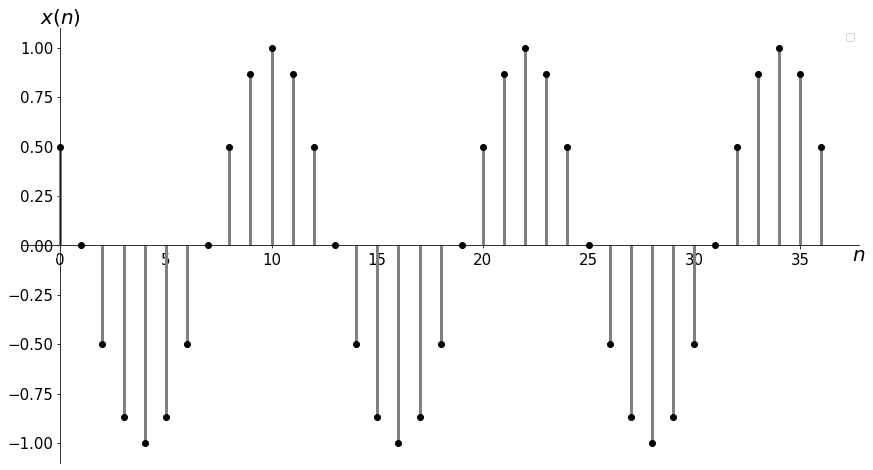

<p align = "center"><b>Figura 5.1. </b> Señal discreta periódica

## **5.4. Propiedades de las señales discretas  con relación a la frecuencia**

<p align = "justify"><b>1. Una señal sinusoidal de tiempo discreto es periódica, sólo si su frecuencia discreta es un número racional, es decir el cociente de dos números enteros.</b>

\begin{equation}
x[n] = x(n+N_0)~ \forall ~n,~ N \in \mathbb{Z} \tag{5.6}
\end{equation}

<p align = "justify">Donde $N_0$ es el mínimo valor entero para que la relación anterior se cumple y toma el nombre de periodo fundamental.

<p align = "justify"><b><h4>Ejemplo 5.2: <h4\></b>Dada la señal $x[n] = Cos(2\pi \cdot f \cdot n)$, demostrar que es una señal periódica.

**Desarrollo**

\begin{equation*}
\begin{split}
Cos(2\pi f n) &= Cos(2\pi f (n+N))\\
&= Cos(2\pi f n)\cdot Cos(2\pi f N) - Sen(2\pi f n)\cdot Sen(2\pi f N)
\end{split}   
\end{equation*}

<p align = "justify">Para que se cumpla la igualdad (condición de periodicidad), $Cos(2\pi f N) = 1$ y $Sen(2\pi f N) = 0$. Esto solo ocurre cuando

\begin{equation*}
2\pi f N = 2\pi k,~\forall k \in \mathbb{Z}
\end{equation*}

<p align = "justify">Por lo tanto, la frecuencia discreta es la siguiente:

\begin{equation}
f = \frac{k}{N} \tag{5.7}
\end{equation}

<p align = "justify">Como la relación $k/N$ es de dos números enteros, $f$ deberá ser un número racional para que la señal $x[n]$ sea periódica. La relación $f$ se deberá reducir hasta que los valores de $k$ y $N$ sean primos relativos. Por ejemplo, para una frecuencia discreta 2/12, se cuenta con un periodo fundamental de 6 muestras que conformarán un ciclo.

\begin{equation}
f = \frac{2}{12} = \frac{1}{6}
\end{equation}

<p align = "justify"><b>2. Señales sinusoidales discretas en el tiempo cuyas frecuencias están separadas múltiplos enteros de $2\pi$ son idénticas.</b>

<p align = "justify">Si se toma por ejemplo la señal $x(n)=Cos(\omega n)$, y modifico su frecuencia angular en $(\omega+2\pi L)]$, es decir en múltiplos enteros de $2\pi$, donde $L$ es un entero, entonces x(n) seguirá siendo igual.

\begin{equation*}
\begin{split}
Cos(\omega n) &= Cos[(\omega+2\pi L) n]\\
&= Cos(\omega n) \cdot Cos(2\pi L n) - Sen(\omega n) \cdot Sen(2\pi L n)
\end{split}
\end{equation*}

<p align = "justify">Con $L$ y $n$  números enteros su producto, suma o diferencia será otro número entero. En consecuencia, todas las secuencias

\begin{equation*}
\begin{split}
x_L(n) = ACos(\omega_L n)\\
\omega_L = \omega_0 + 2\pi L
\end{split}
\end{equation*}

\begin{equation}
-\pi \leq \omega_0 < \pi \tag{5.8}
\end{equation}

<p align = "justify">son idénticas. Los valores de frecuencia tales que $|\omega|>\pi$ se llaman <i>aliasing</i>, como se muestra en la figura 5.2.

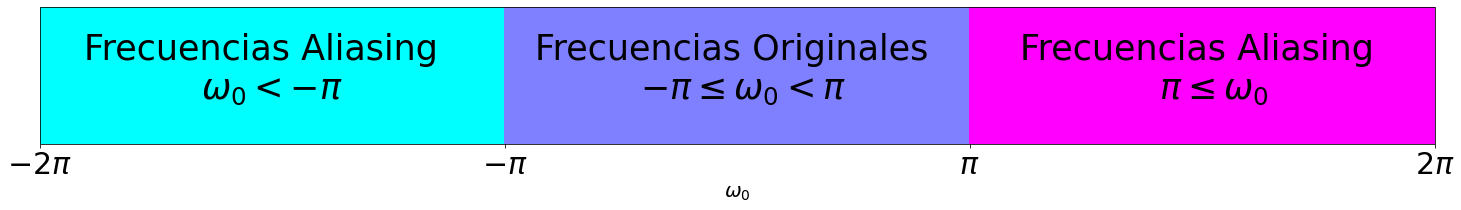

<p align = "center"><b>Figura 5.2. </b> Rangos de frecuencia para señales discretas periódicas

<p align = "justify"><b><h4>Ejemplo 5.3: <h4\></b>Sea la señal discreta $x(n) = Cos\left(\frac{\pi}{6}n \right)$. Determine si es una señal original o es un aliasing.

**Desarrollo**

\begin{equation*}
|\omega_0| = \left| \frac{\pi}{6} \right| < \pi
\end{equation*}

<p align = "justify">Por lo tanto, la señal $x(n)$ es una señal original. Esta señal se muestra en la figura 5.3.

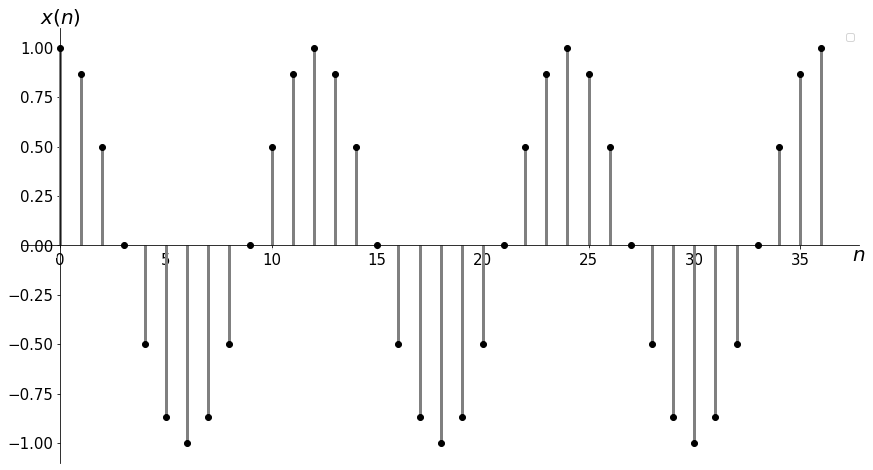

<p align = "center"><b>Figura 5.3. </b> Señal discreta original

<p align = "justify"><b><h4>Ejemplo 5.4: <h4\></b>Determine si la señal $x[n] = Cos(\frac{4 \pi}{3} n)$ es una señal original o un aliasing.

**Desarrollo**

\begin{equation*}
|\omega| = \left|\frac{4 \pi}{3} \right| > \pi
\end{equation*}

<p align = "justify">Por lo tanto, la señal $x[n]$ es un aliasing de otra señal de menor frecuencia. Como esto ocurre para señales separadas múltiplos de $2 \pi$, bastará con determinar cual es el grado de separación en múltiplos de $2 \pi L$ sobre la señal con aliasing para hallar la original.

\begin{equation*}
|\omega_0| = \left|\frac{4 \pi}{3} - 2 \pi \right|= \left|-\frac{2 \pi}{3}\right| < \pi
\end{equation*}

<p align = "justify">La señal discreta original es $ Cos\left(-\frac{2 \pi}{3} n\right) =  Cos\left(\frac{2 \pi}{3} n\right)$ y su gráfica  se muestra en la siguiente figura.

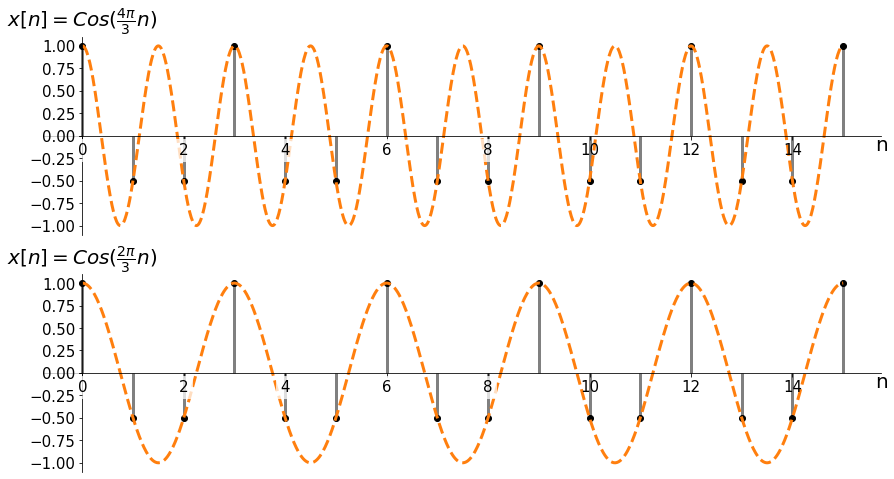

<p align = "center"><b>Figura 5.4. </b> Señal discreta original y un aliasing

<p align = "justify">De la propiedad anterior se deriva que la frecuencia de muestreo debe ser mayor que el doble de la frecuencia de la señal para que no exista aliasing o copias. Esto se conoce como teorema de muestreo o teorema de Nyquist.

\begin{equation}
|\omega| \leq \pi  \tag{5.9}
\end{equation}
\begin{equation}
|2 \pi f| \leq \pi
\end{equation}
\begin{equation}
|f| \leq \frac{1}{2} \tag{5.10}
\end{equation}
\begin{equation}
\left|\frac{F}{F_s}\right| \leq \frac{1}{2}
\end{equation}
\begin{equation}
2|F| \leq |F_s| \tag{5.11}
\end{equation}



<p align = "justify"><b>3. La tasa de oscilación más alta de una señal sinusoidal discreta en el tiempo, se alcanza cuando $|\omega| = \pi$, o lo que es lo mismo $|f| = \frac{1}{2}$.</b>

<p align = "justify">El tablero 5.3 permite evaluar la función $x[n] = Cos(2 \pi f n)$ en una secuencia de frecuencias dadas.

Código 5.3: genera senales cosenoidales discretas.

interactive(children=(Dropdown(description='Valor de f: ', options=(('0', 0), ('1/16', 0.0625), ('1/8', 0.125)…

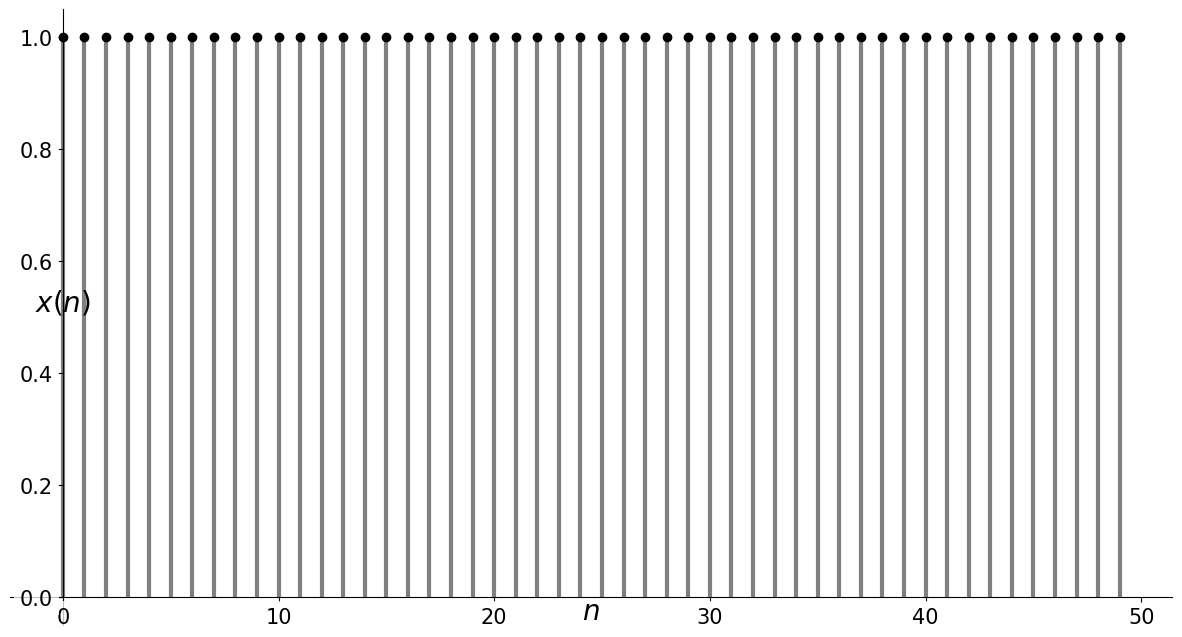

In [8]:
def widget4(f):
    n = np.arange(0, 50)
    fig, ax = plt.subplots(1)
    ax = Ax(ax)
    x = np.cos(2*np.pi*f*n)
    ax.stem(n, x,  use_line_collection=True,                                    #Se realiza la gráfica discreta
            linefmt='grey', markerfmt='ko',
            basefmt=" ")
    ax.set_xlabel('$n$')
    ax.set_ylabel('$x(n)$')

display(ipy.interactive(
    widget4,
    f=ipy.Dropdown(
        options = [('0', 0), ('1/16', 1/16),
                   ('1/8', 1/8), ('1/4', 1/4),
                   ('1/2', 1/2)],
        description='Valor de f: ')
))

<p align = "center"><b>Tablero 5.3. </b> Señal cosenoidal discreta para diferentes valores de frecuencia

<p align = "justify">Es interesante también saber, aunque ya se sepa, que ocurre entre $\pi <\omega_0 < 2 \pi$. Para ello consideremos sinusoides de frecuencia $\omega_1 = \omega_0$ y $\omega_2 = 2\pi – \omega_0$. Note que $\omega_1$ varía entre $\pi$ y $2 \pi$ y $\omega_2$ varía entre $\pi$ y $0$.

\begin{equation*}
\begin{split}
x_1(n) &= ACos(\omega_1n)\\
&= ACos(\omega_0n)
\end{split}
\end{equation*}

\begin{equation*}
\begin{split}
x_2(n) &= ACos(\omega_2n)\\
&= ACos((2 \pi - \omega_0)n)\\
&= ACos(-\omega_0n)\\
&= x_1(n)
\end{split}
\end{equation*}

<p align = "justify">Por lo tanto, $x_1(n)$ es un aliasing de $x_2(n)$ (ver figura 5.5).

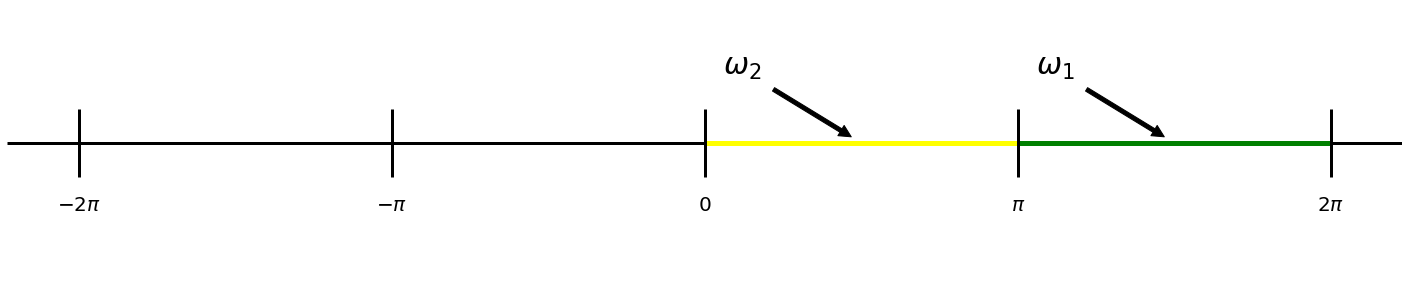

<p align = "center"><b>Figura 5.5. </b> Frecuencia original y un aliasing

## **Para resumir:**

<p align = "justify">Una señal análoga continua en el tiempo está dada por:

\begin{equation}
x(t) = ACos(\Omega t + \theta) \tag{5.12}
\end{equation}

<p align = "justify">Y una señal discreta, con $F_s = 1/T_S$ está dada por:
\begin{equation}
x[n] = ACos(2 \pi f n + \theta) \tag{5.13}
\end{equation}

<p align = "justify">Donde $f = \frac{F}{F_s}$ y $\omega = \Omega \cdot T_s$. Entonces, los rangos de frecuencia continua son:

\begin{equation}
-\infty < F < \infty\\
-\infty < \Omega < \infty \tag{5.14}
\end{equation}

Y para frecuencia discreta:

\begin{equation}
-\frac{1}{2} \leq f < \frac{1}{2}\\
-\pi \leq \omega < \pi \tag{5.15}
\end{equation}

<p align = "justify">La siguiente figura muestra una tabla de resumen.

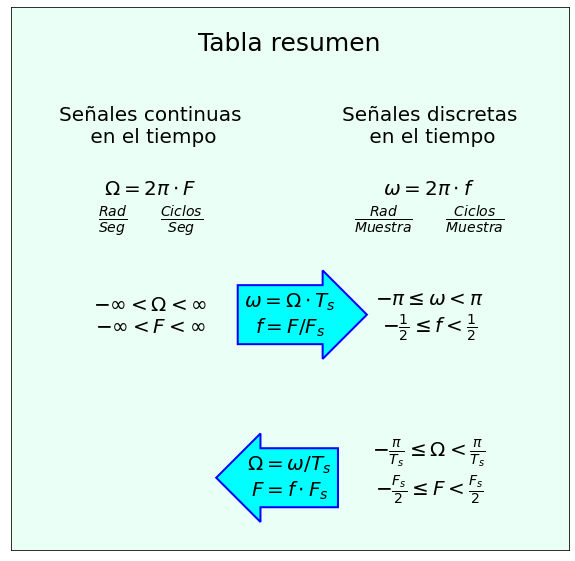

<p align = "center"><b>Figura 5.6. </b> Tabla de resumen

## **5.5. Implicaciones del muestreo uniforme en el tiempo con relación a la frecuencia**

<p align = "justify">Se analizará a partir de las siguientes señales:

\begin{equation}
x_1(t) = cos(2\pi \cdot 20 t)\\
x_2(t) = cos(2\pi \cdot 100 t)
\end{equation}

<p align = "justify">Este par de señales serán muestreadas a $80$ muestras/seg. Por lo tanto, las señales discretizadas son:

\begin{equation}
x_1(t) = cos\left(2\pi \cdot \frac{20}{80} n \right) = cos\left( \frac{\pi}{2}n \right)\\
x_2(t) = cos\left(2\pi \cdot \frac{100}{80} n \right) = cos\left( \frac{5\pi}{2}n \right)
\end{equation}

<p align = "justify">de allí se puede decir que la señale discretizada $x_1(n)$, es original, ya que la frecuencia de muestreo es mayor a 2 veces su frecuencia, $80$ muestras/seg $< 2\cdot 20 Hz$. Por su parte $x_2(n)$ su frecuencia discreta en radianes $\omega$ es mayor a $\pi$, por lo tanto es un aliasing de alguna señal discreta en el espacio $\{ -\pi, \pi\}$.

\begin{equation}
x_2(n) = cos\left( \frac{5\pi}{2}n \right)\\
= cos\left( \left[\frac{4\pi}{2} + \frac{\pi}{2}\right] n \right)
\end{equation}

<p align = "justify">Como señales separas en frecuencias por múltiplos de $2\pi$ son iguales, entonces:

\begin{equation}
x_2(n) = cos\left( \frac{\pi}{2} n \right)
\end{equation}

<p align = "justify">De allí se observa que $x_2(n)$ es igual a $x_1(n)$ cuando se muestrean a razón de $80$ muestras/seg. También se puede decir que la señal $x_2(n)$ es un aliasing de $x_1(n)$. Se pueden generar más aliasings de $x_1(t)$ a partir de la tasa de muestreo $F_s$, a partir de:

\begin{equation*}
cos\left( \left[2 \pi \frac{F}{F_s} + 2\pi k \right]n \right),~|k|= 1, 2, 3, ...
\end{equation*}

\begin{equation}
cos\left( 2\pi \left[\frac{F+kF_s}{F_s} \right]n \right)
\end{equation}

<p align = "justify">Donde para el caso de la señal $x_1(t)  = cos(2\pi \cdot20\cdot t)$ a $Fs = 80$ muestras/seg, se generan los siguientes aliasings:

<ul type="none">

<li>$F_1 = 20 + 80 = 100 Hz$ Primer aliasing</il>

<li>$F_2 = 20 + 160 = 180 Hz$ Segundo aliasing</il>

<li>$F_3 = 20 + 240 = 260 Hz$ Tercer aliasing</il>

<li>$F_k = 20 + k 80 = F_k Hz$ k-ésimo aliasing</il>

</ul>

En resumen, las siguientes señales serán aliasing de $x_1(t)  = cos(2\pi \cdot20\cdot t)$, cuando se muestrea a $Fs = 80$ muestras/seg.

<ul type="none">

<li>$x_2(t) = cos(2\pi\cdot 100\cdot t)$ Aliasing 1

<li>$x_3(t) = cos(2\pi\cdot 180\cdot t)$ Aliasing 2

<li>$x_4(t) = cos(2\pi\cdot 240\cdot t)$ Aliasing 3

<li>$x_n(t) = cos(2\pi\cdot (F+k F_s)\cdot t)$ Aliasing k

</ul>

<p align = "justify"><b><h4>Ejemplo 5.5: <h4\></b>La señal de voltaje de salida de un transformador de potencia es:

\begin{equation}
v(t) = 110cos(2\pi \cdot 60\cdot t) + 10cos(2\pi \cdot 180\cdot t)
\end{equation}

Y se requiere muestrear a $v(t)$ a razón de $120$ muestras/seg.

**Desarrollo**

\begin{equation}
v(n) = 110cos\left(2\pi \cdot \frac{60}{120} \cdot n \right) + 10cos\left(2\pi \cdot \frac{180}{120} \cdot n \right)\\
= 110cos(\pi n) + 10cos(3\pi n)\\
= 110cos(\pi n) + 10cos([2\pi+\pi] n)\\
= 110cos(\pi n) + 10cos(\pi n)\\
= 120cos(\pi n)
\end{equation}

Llevando a $v(n)$ a su equivalente $v(t)$

\begin{equation}
v(n) = 120cos\left(2\pi \cdot \frac{1}{2} \cdot n \right)\\
f = \frac{1}{2}\\
F = \frac{F_s}{2} = \frac{120}{2} = 60 Hz\\
v(t) = 120cos(2\pi\cdot 60 \cdot t)
\end{equation}

Lo cual es un error, debido al aliasing presente en la componente frecuencial de $180$Hz. La señal $v(t)$ y su equivalente discreto $v(n)$ cuando se muestrea a $120$ muestras/seg se muestra en la figura 5.7.

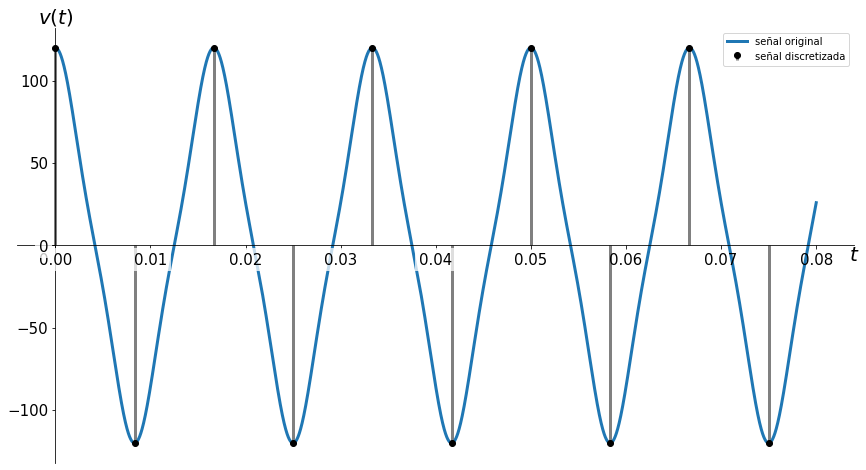

<p align = "center"><b>Figura 5.7. </b> Señal muestreada erróneamente

<p align = "justify"><b><h4>Ejemplo 5.6: <h4\></b>Muestrear la señal $v(t)$ del ejemplo anterior a razón de $400$ muestras/seg.

**Desarrollo**

\begin{equation}
v(n) = 110cos\left(2\pi \cdot \frac{60}{400} \cdot n \right) + 10cos\left(2\pi \cdot \frac{180}{400} \cdot n \right)\\
= 110cos\left(\frac{3\pi}{10} \cdot n \right) + 10cos\left(\frac{9\pi}{10} \cdot n \right)
\end{equation}

Dado que sus frecuencias discretas se encuentran entre $-\pi$ y $\pi$, la señal discretizada tiene componentes originales y la señal $x(t)$ puede ser fácilmente reconstruida así:

\begin{equation}
v(n) = 110cos\left(\frac{3\pi}{10} \cdot n \right) + 10cos\left(\frac{9\pi}{10} \cdot n \right)\\
= 110cos\left(2\pi \cdot \frac{3}{20} \cdot n \right) + 10cos\left(2\pi \cdot \frac{9}{20} \cdot n \right)
\end{equation}

de allí sus frecuencias discretas y continuas son:

\begin{equation}
f_1 = \frac{3}{20}\\
f_2 = \frac{9}{20}\\
F = f\cdot F_s\\
F_1 = \frac{3}{20}\cdot 400 =60Hz\\
F_2 = \frac{9}{20}\cdot 400 = 180Hz
\end{equation}

La señal $v(t)$ y su equivalente discreto $v(n)$ cuando se muestrea a $400$ muestras/seg se muestra en la figura 5.8.

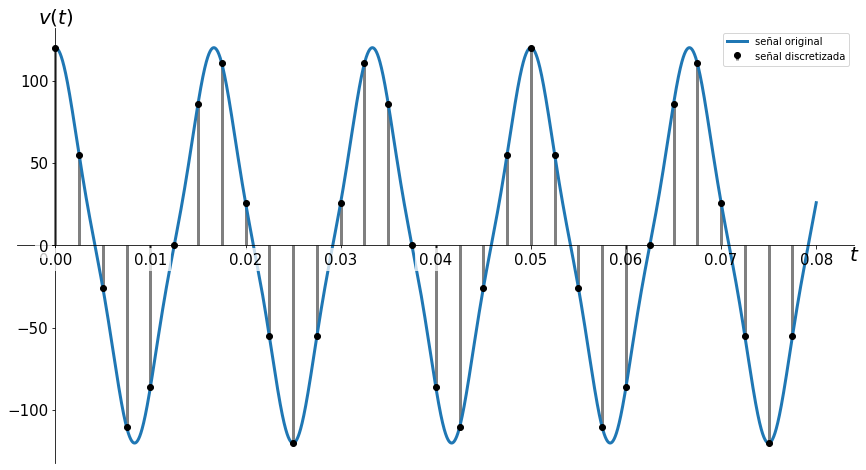

<p align = "center"><b>Figura 5.8. </b> Señal muestreada correctamente

## **Ejercicios propuestos**

<p align = "justify"><b>Ejercicio 5.1: </b>Para la señal $x(t)=5cos(2000\pi t)$, determine las frecuencias de las señales que puedan ser aliasing de $x(t)$ cuando se muestrea a una frecuencia de $3000$ muestras/seg. Grafique el resultado y discútalo.

<p align = "justify"><b>Ejercicio 5.2: </b> Para la señal
\begin{equation}
 x(t) = 5cos(2000\pi t)+10cos(2\pi\cdot 4000\cdot t) + 2 sen(14000\pi t)
\end{equation}

<ol type="a">

<li>Muestrear la señal $x(t)$ a razón de $3000$ muestras por segundo.

<li>Calcular el $x(n)$ y determine a que señal $x(t)$ corresponde.

<li>Determine la frecuencia de Nyquiz para discretizar a $x(t)$ sin aliasing.

<li>Si se desea muestrear a $x(t)$ a razón de $8000$ muestras/seg, calcular $x(n)$.

</ol>

Para cada cálculo, discuta los resultados.

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.